# Basic text processing

https://spacy.io/usage/linguistic-features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


## Word and Character based tokenization

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

my_stop_words = {'is', 'the'}
# UNIGRAMS
vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word', stop_words = None)
#vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', stop_words = 'english')
#vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', stop_words = my_stop_words)

# UNIGRAMS and BIGRAMS
#vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')

# Character GRAMS
#vectorizer = CountVectorizer(ngram_range=(3,4), analyzer='char')
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

print(X.todense())


['and', 'and this', 'document', 'document is', 'first', 'first document', 'is', 'is the', 'is this', 'one', 'second', 'second document', 'the', 'the first', 'the second', 'the third', 'third', 'third one', 'this', 'this document', 'this is', 'this the']
[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


# Whitespace tokenizer

In [2]:
import spacy
from spacy import displacy
from pathlib import Path
from spacy.tokens import Doc

class WhitespaceTokenizer:
    def __init__(self, vocab):
        self.vocab = vocab

    def __call__(self, text):
        words = text.split(" ")
        spaces = [True] * len(words)
        # Avoid zero-length tokens
        for i, word in enumerate(words):
            if word == "":
                words[i] = " "
                spaces[i] = False
        # Remove the final trailing space
        if words[-1] == " ":
            words = words[0:-1]
            spaces = spaces[0:-1]
        else:
           spaces[-1] = False
            
        return Doc(self.vocab, words=words, spaces=spaces)

nlp = spacy.blank("en")
nlp.tokenizer = WhitespaceTokenizer(nlp.vocab)
doc = nlp("What's happened to me? he thought. It wasn't a dream.")
print([token.text for token in doc])

["What's", 'happened', 'to', 'me?', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.']


# Tokenization with Spacy

In [3]:
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

save_figures = False

print("token".ljust(10), "lemma".ljust(10), "pos".ljust(6), "tag".ljust(6), "dep".ljust(10),
            "shape".ljust(10), "alpha", "stop")
print("------------------------------------------------------------------------------")
for token in doc:
    print(token.text.ljust(10), token.lemma_.ljust(10), token.pos_.ljust(6), token.tag_.ljust(6), token.dep_.ljust(10),
            token.shape_.ljust(10), token.is_alpha, token.is_stop)

html_dep = displacy.render(doc, style="dep", jupyter=True)

if save_figures:
    file_name = "demo-dep.html"
    output_path = Path("./images/" + file_name)
    output_path.open("w", encoding="utf-8").write(html_dep)


token      lemma      pos    tag    dep        shape      alpha stop
------------------------------------------------------------------------------
Apple      Apple      PROPN  NNP    nsubj      Xxxxx      True False
is         be         VERB   VBZ    aux        xx         True True
looking    look       VERB   VBG    ROOT       xxxx       True False
at         at         ADP    IN     prep       xx         True True
buying     buy        VERB   VBG    pcomp      xxxx       True False
U.K.       U.K.       PROPN  NNP    compound   X.X.       False False
startup    startup    NOUN   NN     dobj       xxxx       True False
for        for        ADP    IN     prep       xxx        True True
$          $          SYM    $      quantmod   $          False False
1          1          NUM    CD     compound   d          False False
billion    billion    NUM    CD     pobj       xxxx       True False


In [8]:
!pip install spacy-wordnet
import spacy
from spacy_wordnet.wordnet_annotator import WordnetAnnotator 

# Load an spacy model (supported models are "es" and "en") 
nlp = spacy.load("en_core_web_sm")
# Spacy 3.x
nlp.add_pipe("spacy_wordnet", after='tagger', config={'lang': nlp.lang})
token = nlp('prices')[0]

# wordnet object link spacy token with nltk wordnet interface by giving acces to
# synsets and lemmas 
token._.wordnet.synsets()
token._.wordnet.lemmas()

# And automatically tags with wordnet domains
token._.wordnet.wordnet_domains()


TypeError: add_pipe() got an unexpected keyword argument 'config'

# Named Entities

In [3]:
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text.ljust(12), ent.label_.ljust(10), ent.start_char, ent.end_char)

html_ent = displacy.render(doc, style="ent", jupyter=True)

if save_figures:
    file_name = "demo-ent.html"
    output_path = Path("./images/" + file_name)
    output_path.open("w", encoding="utf-8").write(html_ent)


Apple        ORG        0 5
U.K.         GPE        27 31
$1 billion   MONEY      44 54


NameError: name 'save_figures' is not defined

# Word embeddings

In [2]:
import numpy as np
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

def display_scatterplot(model, words):

    if model.shape[1] == 2:
        twodim = model
    else:
        twodim = PCA().fit_transform(model)[:,:2]
    
    plt.style.use('ggplot')
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

# Computation of Word Embeddings

## Toy corpus

In [3]:
corpus = [
    'she queen',
    'she woman',
    'he king',
    'he man',
    'london uk capital',
    'lisbon portugal capital',   
]

def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)
print(tokenized_corpus)

[['she', 'queen'], ['she', 'woman'], ['he', 'king'], ['he', 'man'], ['london', 'uk', 'capital'], ['lisbon', 'portugal', 'capital']]


## Vocabulary

In [5]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(word2idx)

{'she': 0, 'queen': 1, 'woman': 2, 'he': 3, 'king': 4, 'man': 5, 'london': 6, 'uk': 7, 'capital': 8, 'lisbon': 9, 'portugal': 10}


## Context windows

In [6]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    sentence_indices = [word2idx[word] for word in sentence]
    print(sentence)
    # for each word, treated as center word
    for center_word_pos in range(len(sentence_indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make sure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(sentence_indices) or center_word_pos == context_word_pos:
                continue

            context_word_idx = sentence_indices[context_word_pos]
            
            print("POS:  ",idx2word[sentence_indices[center_word_pos]], " ", idx2word[context_word_idx])
            idx_pairs.append((sentence_indices[center_word_pos], context_word_idx, 1))

## Negative sampling
for word1 in vocabulary:
    for word2 in vocabulary:
        if((word2idx[word1], word2idx[word2], 1) not in idx_pairs):
            print("NEG:  ",word1, " ", word2)
            idx_pairs.append((word2idx[word1], word2idx[word2], 0))

idx_pairs = np.array(idx_pairs)


['she', 'queen']
POS:   she   queen
POS:   queen   she
['she', 'woman']
POS:   she   woman
POS:   woman   she
['he', 'king']
POS:   he   king
POS:   king   he
['he', 'man']
POS:   he   man
POS:   man   he
['london', 'uk', 'capital']
POS:   london   uk
POS:   london   capital
POS:   uk   london
POS:   uk   capital
POS:   capital   london
POS:   capital   uk
['lisbon', 'portugal', 'capital']
POS:   lisbon   portugal
POS:   lisbon   capital
POS:   portugal   lisbon
POS:   portugal   capital
POS:   capital   lisbon
POS:   capital   portugal
NEG:   she   she
NEG:   she   he
NEG:   she   king
NEG:   she   man
NEG:   she   london
NEG:   she   uk
NEG:   she   capital
NEG:   she   lisbon
NEG:   she   portugal
NEG:   queen   queen
NEG:   queen   woman
NEG:   queen   he
NEG:   queen   king
NEG:   queen   man
NEG:   queen   london
NEG:   queen   uk
NEG:   queen   capital
NEG:   queen   lisbon
NEG:   queen   portugal
NEG:   woman   queen
NEG:   woman   woman
NEG:   woman   he
NEG:   woman   king
NE

## Learning cycle

In [47]:
import torch.nn.functional as F

embedding_dims = 4
num_epochs = 100
learning_rate = 0.1

Wi = torch.randn(embedding_dims, vocabulary_size, requires_grad=True).float()
Wo = torch.randn(vocabulary_size, embedding_dims, requires_grad=True).float()

logreg = torch.nn.Sigmoid()
loss = torch.nn.BCELoss()
for epo in range(num_epochs):
    train_loss = 0
    idx_pairs = np.random.permutation(idx_pairs)
    for word_i, word_o, label in idx_pairs:
        
        # Get the current word-pair label
        y_label = torch.from_numpy(np.array(label)).float()
        
        # Compute the condiditional probablity between the two words
        z = torch.dot(Wi[:,word_i], Wo[word_o,:])
        p_wo_wi = logreg(z)

        # Compute the error with the positive/negative label
        output = loss(p_wo_wi, y_label)
        train_loss += output

        # Propagate the error backward and update the parameters
        output.backward()
        Wi[:,word_i].data -= learning_rate * Wi.grad.data[:,word_i]
        Wo[word_o,:].data -= learning_rate * Wo.grad.data[word_o,:]

        # Reset
        Wi.grad.data.zero_()
        Wo.grad.data.zero_()
                
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {train_loss/len(idx_pairs)}')

w2v = (Wi.T+Wo)/2

Loss at epo 0: 0.8631597757339478
Loss at epo 10: 0.22857284545898438
Loss at epo 20: 0.14809946715831757
Loss at epo 30: 0.10085801780223846
Loss at epo 40: 0.06996438652276993
Loss at epo 50: 0.05446501076221466
Loss at epo 60: 0.04623841494321823
Loss at epo 70: 0.04102381691336632
Loss at epo 80: 0.03762409836053848
Loss at epo 90: 0.0351136177778244


## Visualize the embeddings

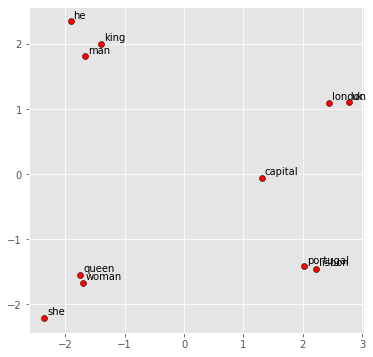

In [48]:
display_scatterplot(w2v.detach().numpy(), vocabulary)


# Pre-trained Word Embeddings

In [1]:

!pip install gensim
import gensim.downloader as api
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


  Using cached gensim-4.1.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
     |████████████████████████████████| 58 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 16.8 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 29.1 MB/s eta 0:00:01
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: '/opt/jupyterhub/lib/python3.8/site-packages/smart_open-5.2.1.dist-info'

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.3% 54.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.1% 85.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.9% 115.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.4% 155.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.9% 198.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.5% 240.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.7% 343.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.4% 372.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.5% 406.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.3% 437.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.2% 468.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.1% 499.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.9% 530.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.7% 561.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.5% 590.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.7% 626.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 42.0% 697.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.2% 784.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.5% 823.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.9% 862.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.1% 900.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.4% 937.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.6% 974.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.6% 1008.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.7% 1042.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.9% 1079.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.3% 1118.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.5% 1155.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.7% 1192.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.9% 1229.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.1% 1264.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.0% 1297.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.9% 1328.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.6% 1357.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.5% 1388.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.4% 1419.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.1% 1448.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 92.0% 1529.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.8% 1576.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.0% 1612.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [13]:
# Load Word2Vec trained on Google News data
wv = api.load('word2vec-google-news-300')

# Load Wiki2Vec trained on Wikipedia
wv2 = KeyedVectors.load_word2vec_format(datapath("enwiki"), binary=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jmag/.local/lib/python3.8/site-packages/gensim/test/test_data/enwiki'

## Word Vectors

In [5]:
# Import NumPy
import numpy as np

# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Import PCA from scikit-learn
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# Import Gensim for the word embeddings
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

for i, word in enumerate(wv.key_to_index):
    if i == 10:
        break
    print(word)


</s>
in
for
that
is
on
##
The
with
said


In [6]:
wv


In [7]:
vec_king = wv['king']
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

## Words Similarity

In [8]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [14]:
print(wv.most_similar(positive=['car', 'batman'], topn=5))

[('Batmobile', 0.5841229557991028), ('vehicle', 0.5716537237167358), ('batmobile', 0.5692459344863892), ('suv', 0.5399793982505798), ('scooter', 0.5391399264335632)]


## Word Analogies


In [10]:
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [7]:
analogy('japan', 'japanese', 'brazil')

'brazilian'

In [15]:
analogy('queen', 'king', 'woman')

'man'

In [16]:
analogy('good', 'fantastic', 'bad')

'horrible'

## Visualization

In [10]:
def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
        
def display_closestwords(model, word):
    
    # get close words
    a = model.similar_by_word(word)
    close_words = [w for (w,s) in a]
    close_words.append(word)
    display_pca_scatterplot(model, close_words)


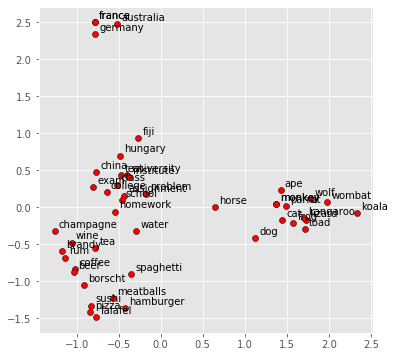

In [11]:
display_pca_scatterplot(wv, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'france', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

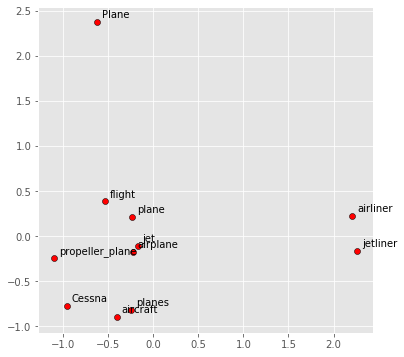

In [13]:
a = display_closestwords(wv, 'plane')

## More

 - Word Embeddings for noisy text https://fasttext.cc/docs/en/english-vectors.html


 - Diachronic Word Embeddings https://nlp.stanford.edu/projects/histwords/


 - Sentence Embeddings https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html
